# Task 1

- You need to create an algorithm that can find outliers in this data by
one column / several columns. E.g. some members have extremely high costs in
the current month and your solution should be able to detect such records
- Think about features and how you would explain it to business people
- All financial columns contain $ sign

#### Columns:

- member_unique_id - member's ID
- gender - member's gender
- dob - member's date of birth
- eligible_year - year
- eligible_month - month
- affiliation_type - doctor's type
- pbp_group - health plan group
- plan_name - health plan name
- npi - doctor's ID
- line_of_business - health plan type
- esrd - True if patient is on dialysis
- hospice - True if patient is in hospice

In [90]:
import pandas as pd

In [91]:
df = pd.read_csv('sfr_test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10530 entries, 0 to 10529
Data columns (total 28 columns):
member_unique_id       10530 non-null int64
gender                 10530 non-null object
dob                    10530 non-null object
eligible_year          10530 non-null int64
eligible_month         10530 non-null int64
affiliation_type       10530 non-null object
pbp_group              10530 non-null object
plan_name              6606 non-null object
npi                    10530 non-null int64
line_of_business       10530 non-null object
esrd                   10530 non-null bool
hospice                10530 non-null bool
ipa_funding            10530 non-null object
ma_premium             10530 non-null object
ma_risk_score          10530 non-null object
mbr_with_rx_rebates    10530 non-null object
partd_premium          10530 non-null object
pcp_cap                10530 non-null object
pcp_ffs                10530 non-null object
plan_premium           10530 non-null object


Columns were named normal
dob is year but has int64 type

In [92]:
# this will allow us to see the entire width of the table
pd.options.display.max_columns = None
df.head()

member_unique_id gender         dob  eligible_year  eligible_month  \
0                 1      F  21/06/1990           2020          202006   
1                 2      M  02/01/1948           2020          202006   
2                 3      M  14/06/1948           2020          202006   
3                 4      M  10/02/1954           2020          202006   
4                 5      M  31/12/1953           2020          202006   

  affiliation_type pbp_group             plan_name  npi line_of_business  \
0        Affiliate   NON-SNP   MEDICARE - CAREFREE    1              HMO   
1        Affiliate   NON-SNP                   NaN    1              HMO   
2        Affiliate   NON-SNP   MEDICARE - CAREFREE    1              HMO   
3        Affiliate     D-SNP  MEDICARE - CARENEEDS    1              HMO   
4        Affiliate   NON-SNP                   NaN    1              HMO   

    esrd  hospice ipa_funding  ma_premium ma_risk_score mbr_with_rx_rebates  \
0  False    False   $2,721.85   $3,611.21         $2.02             $632.13   
1  False    False   $5,060.21   $6,817.97         $5.24           $2,535.98   
2  False    False   $3,159.82   $3,443.32         $3.17             $595.96   
3  False    False   $9,563.23  $11,015.31         $9.92             $181.95   
4  False    False  $17,456.26  $17,590.58        $25.55             $810.83   

  partd_premium  pcp_cap pcp_ffs plan_premium       prof reinsurance  \
0        $82.13  $474.83   $0.00    $3,507.00      $0.00       $7.92   
1       $205.93  $457.04   $0.00    $6,204.84      $0.00       $8.13   
2        $59.13  $482.63   $0.00    $4,012.46      $0.00       $7.92   
3       $265.65  $469.04   $0.00    $9,770.61      $0.00       $8.30   
4       $210.62  $527.98   $0.00   $19,976.13  $8,875.80       $8.90   

  risk_score_partd          rx rx_rebates rx_with_rebates rx_without_rebates  \
0            $0.00       $0.00      $0.00           $0.00              $0.00   
1            $0.00  $11,289.69      $0.00      $10,688.46         $10,859.82   
2            $0.00       $0.00      $0.00           $0.00              $0.00   
3            $0.00      $73.88      $0.00          $62.87             $64.91   
4            $0.00     $522.48      $0.00         $517.56            $606.01   

  spec_cap  
0  $843.78  
1  $906.77  
2  $815.84  
3  $846.26  
4  $867.55

Check the missing values

In [93]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data(df)

Total    Percent
plan_name             3924  37.264957
spec_cap                 0   0.000000
rx_without_rebates       0   0.000000
gender                   0   0.000000
dob                      0   0.000000
eligible_year            0   0.000000
eligible_month           0   0.000000
affiliation_type         0   0.000000
pbp_group                0   0.000000
npi                      0   0.000000
line_of_business         0   0.000000
esrd                     0   0.000000
hospice                  0   0.000000
ipa_funding              0   0.000000
ma_premium               0   0.000000
ma_risk_score            0   0.000000
mbr_with_rx_rebates      0   0.000000
partd_premium            0   0.000000
pcp_cap                  0   0.000000
pcp_ffs                  0   0.000000
plan_premium             0   0.000000
prof                     0   0.000000
reinsurance              0   0.000000
risk_score_partd         0   0.000000
rx                       0   0.000000
rx_rebates               0   0.000000
rx_with_rebates          0   0.000000
member_unique_id         0   0.000000

Let's check the columns for outliers, while visually without the algorithm

In [94]:
def show_value_counts(column_name):
    print(df[column_name].value_counts())

In [95]:
show_value_counts('gender')
#without outliers

F    5658
M    4872
Name: gender, dtype: int64


In [96]:
df['dob'] = pd.to_datetime(df['dob'],format='%d/%m/%Y')
df['dob'].describe()
#1919 year it may be true and 1999 too

count                   10530
unique                   6890
top       1953-07-01 00:00:00
freq                        8
first     1919-12-16 00:00:00
last      1999-05-14 00:00:00
Name: dob, dtype: object

In [97]:
show_value_counts('eligible_year')
#without outliers

2020    10530
Name: eligible_year, dtype: int64


In [98]:
#the month looks strange, but we will not use it in the analysis, so leave it
show_value_counts('eligible_month')

202006    10530
Name: eligible_month, dtype: int64


In [99]:
show_value_counts('affiliation_type')
#without outliers

Affiliate    7282
VIPcare      2778
SaludVIP      470
Name: affiliation_type, dtype: int64


In [100]:
show_value_counts('pbp_group')
#without outliers

NON-SNP    7826
D-SNP      2704
Name: pbp_group, dtype: int64


In [101]:
#the only column with omissions
show_value_counts('plan_name')

MEDICARE - CAREFREE     4469
MEDICARE - CARENEEDS    2006
MEDICARE - CAREONE       131
Name: plan_name, dtype: int64


In [102]:
show_value_counts('line_of_business')
#without outliers

HMO    10530
Name: line_of_business, dtype: int64


In [103]:
show_value_counts('esrd')
#without outliers

False    10503
True        27
Name: esrd, dtype: int64


In [104]:
show_value_counts('hospice')
#without outliers

False    10511
True        19
Name: hospice, dtype: int64


In [105]:
def convert_dollars_to_float(df, column):
    return df[column].replace('[\$,]', '', regex=True).astype(float)

def show_describe(df, column):
    copy_df = df.copy()
    print(convert_dollars_to_float(copy_df, column).describe())

def show_boxplot(df, column):
    copy_df = df.copy()
    copy_df[column] = convert_dollars_to_float(copy_df, column)
    copy_df.boxplot(column=[column])

show_describe(df,'ipa_funding')

count     10530.000000
mean      10657.849594
std        7690.191694
min        1302.360000
25%        5390.645000
50%        8723.135000
75%       13444.632500
max      113850.930000
Name: ipa_funding, dtype: float64


We can see that median is $8723 for this column. Third quartile Q3 (75%) = $13445.

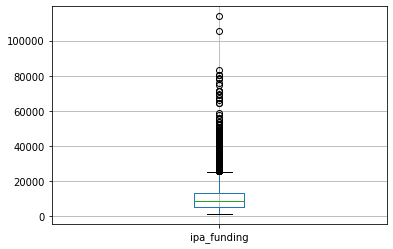

In [106]:
# Box with wiskers
show_boxplot(df,'ipa_funding')

The interquartile span is the distance between first quartile Q1 and third quartile Q3.
Anything larger than the upper whisker is an outlier.
We can find them by adding to the third quartile an inter-quarter span equal to Q3 + 1.5*(Q3-Q1)

In [107]:
from IPython.display import Image
Image('boxplot.png')

In [108]:
def get_bigger_whisker(df, column):
    #copy_df = df.copy()
    df[column] = df[column].replace('[\$,]', '', regex=True).astype(float)
    q3 = df[column].quantile(.75)
    q1 = df[column].quantile(.25)
    iqr = q3 - q1
    result = q3 + (1.5 * iqr)
    return result

def get_df_outlier(df, column):
    copy_df = df.copy()
    bigger_whisker =  get_bigger_whisker(copy_df, column)
    return copy_df[copy_df[column] > bigger_whisker]

def get_df_without_outlier(df, column):
    copy_df = df.copy()
    bigger_whisker =  get_bigger_whisker(copy_df, column)
    return copy_df[copy_df[column] <= bigger_whisker]

#for example get outlier by column
df_outlier_ipa_funding = get_df_outlier(df, 'ipa_funding')
df_outlier_ipa_funding

member_unique_id gender        dob  eligible_year  eligible_month  \
57                   58      F 1967-03-06           2020          202006   
62                   63      M 1944-06-29           2020          202006   
107                 108      M 1956-05-18           2020          202006   
124                 125      M 1955-04-20           2020          202006   
140                 141      F 1940-11-09           2020          202006   
167                 168      M 1959-08-01           2020          202006   
207                 208      F 1969-08-22           2020          202006   
209                 210      M 1953-01-09           2020          202006   
211                 212      F 1957-02-09           2020          202006   
223                 224      M 1945-12-03           2020          202006   
269                 270      M 1951-02-16           2020          202006   
281                 282      M 1966-09-07           2020          202006   
304                 305      F 1962-10-09           2020          202006   
310                 311      M 1973-02-16           2020          202006   
332                 333      F 1960-10-07           2020          202006   
418                 419      F 1995-05-01           2020          202006   
429                 430      F 1956-11-24           2020          202006   
482                 483      F 1946-12-17           2020          202006   
495                 496      F 1946-11-18           2020          202006   
563                 564      M 1963-12-26           2020          202006   
566                 567      M 1957-02-21           2020          202006   
586                 587      F 1953-04-15           2020          202006   
664                 665      F 1948-12-20           2020          202006   
681                 682      F 1960-08-22           2020          202006   
691                 692      M 1956-08-01           2020          202006   
703                 704      M 1932-05-11           2020          202006   
720                 721      M 1932-09-24           2020          202006   
757                 758      F 1953-07-28           2020          202006   
767                 768      M 1953-03-28           2020          202006   
780                 781      F 1965-04-22           2020          202006   
...                 ...    ...        ...            ...             ...   
10180             10181      M 1934-05-09           2020          202006   
10186             10187      F 1942-11-24           2020          202006   
10200             10201      F 1959-02-10           2020          202006   
10220             10221      F 1943-09-08           2020          202006   
10231             10232      M 1963-12-20           2020          202006   
10242             10243      M 1953-11-06           2020          202006   
10263             10264      F 1935-04-19           2020          202006   
10269             10270      F 1961-09-03           2020          202006   
10281             10282      M 1960-05-13           2020          202006   
10298             10299      F 1954-09-22           2020          202006   
10325             10326      F 1959-10-17           2020          202006   
10332             10333      M 1952-03-03           2020          202006   
10333             10334      M 1939-02-28           2020          202006   
10334             10335      M 1956-06-14           2020          202006   
10338             10339      F 1949-05-25           2020          202006   
10368             10369      M 1950-05-23           2020          202006   
10379             10380      F 1948-05-28           2020          202006   
10393             10394      F 1970-09-11           2020          202006   
10418             10419      F 1950-08-30           2020          202006   
10427             10428      F 1945-04-02           2020          202006   
10446             10447      M 1939-09-05           202

In [109]:
#for example get data without outlier by column
df_without_ipa_funding = get_df_without_outlier(df, 'ipa_funding')
df_without_ipa_funding

member_unique_id gender        dob  eligible_year  eligible_month  \
0                     1      F 1990-06-21           2020          202006   
1                     2      M 1948-01-02           2020          202006   
2                     3      M 1948-06-14           2020          202006   
3                     4      M 1954-02-10           2020          202006   
4                     5      M 1953-12-31           2020          202006   
5                     6      M 1954-05-06           2020          202006   
6                     7      F 1954-01-01           2020          202006   
7                     8      F 1965-08-15           2020          202006   
8                     9      F 1949-07-22           2020          202006   
9                    10      M 1955-04-25           2020          202006   
10                   11      F 1951-01-01           2020          202006   
11                   12      M 1944-05-29           2020          202006   
12                   13      F 1954-02-10           2020          202006   
13                   14      M 1953-01-20           2020          202006   
14                   15      F 1968-11-06           2020          202006   
15                   16      F 1951-11-20           2020          202006   
16                   17      M 1953-05-20           2020          202006   
17                   18      M 1952-04-09           2020          202006   
18                   19      M 1969-03-25           2020          202006   
19                   20      M 1936-03-14           2020          202006   
20                   21      F 1955-02-10           2020          202006   
21                   22      M 1953-07-28           2020          202006   
22                   23      F 1947-10-30           2020          202006   
23                   24      M 1943-08-15           2020          202006   
24                   25      F 1953-01-02           2020          202006   
25                   26      F 1947-11-01           2020          202006   
26                   27      M 1955-05-10           2020          202006   
27                   28      F 1953-02-25           2020          202006   
28                   29      F 1951-09-11           2020          202006   
29                   30      M 1954-05-11           2020          202006   
...                 ...    ...        ...            ...             ...   
10496             10497      F 1959-04-12           2020          202006   
10497             10498      M 1962-01-25           2020          202006   
10498             10499      M 1960-06-29           2020          202006   
10499             10500      M 1940-12-28           2020          202006   
10500             10501      M 1962-02-08           2020          202006   
10501             10502      F 1948-04-11           2020          202006   
10502             10503      F 1965-10-08           2020          202006   
10503             10504      F 1962-01-30           2020          202006   
10505             10506      F 1937-09-11           2020          202006   
10506             10507      M 1933-11-04           2020          202006   
10507             10508      F 1980-10-08           2020          202006   
10508             10509      F 1952-05-02           2020          202006   
10509             10510      F 1952-02-14           2020          202006   
10510             10511      M 1931-08-03           2020          202006   
10511             10512      M 1949-11-22           2020          202006   
10512             10513      F 1940-12-19           2020          202006   
10514             10515      F 1938-07-18           2020          202006   
10515             10516      M 1951-05-13           2020          202006   
10516             10517      F 1929-07-23           2020          202006   
10517             10518      F 1961-02-04           2020          202006   
10518             10519      M 1957-10-19           202

In [110]:
#it can be chain, for example
df_outliers = get_df_outlier(df_outlier_ipa_funding,'ma_premium')
df_outliers = get_df_outlier(df_outliers,'rx_without_rebates')
df_outliers

member_unique_id gender        dob  eligible_year  eligible_month  \
2757              2758      M 1948-05-05           2020          202006   

     affiliation_type pbp_group            plan_name  npi line_of_business  \
2757        Affiliate   NON-SNP  MEDICARE - CAREFREE   22              HMO   

      esrd  hospice  ipa_funding  ma_premium ma_risk_score  \
2757  True    False     55525.69    75263.21         $9.10   

     mbr_with_rx_rebates partd_premium  pcp_cap pcp_ffs plan_premium   prof  \
2757             $280.92       $297.06  $548.85   $0.00   $66,009.34  $0.00   

     reinsurance risk_score_partd          rx rx_rebates rx_with_rebates  \
2757       $9.10            $0.00  $14,479.68      $0.00      $15,104.06   

      rx_without_rebates spec_cap  
2757            15181.99  $721.89

The function can accept multiple columns with the second argument if it need

In [111]:
def get_df_outlier_multi(df, arr_columns):
    copy_df = df.copy()
    for column in arr_columns:
        bigger_whisker =  get_bigger_whisker(copy_df, column)
        copy_df =  copy_df[copy_df[column] > bigger_whisker]
    return copy_df

df_outlier_multi = get_df_outlier_multi(df, ['ipa_funding','ma_premium','rx_without_rebates'])
df_outlier_multi
#result is equal

member_unique_id gender        dob  eligible_year  eligible_month  \
2757              2758      M 1948-05-05           2020          202006   

     affiliation_type pbp_group            plan_name  npi line_of_business  \
2757        Affiliate   NON-SNP  MEDICARE - CAREFREE   22              HMO   

      esrd  hospice  ipa_funding  ma_premium ma_risk_score  \
2757  True    False     55525.69    75263.21         $9.10   

     mbr_with_rx_rebates partd_premium  pcp_cap pcp_ffs plan_premium   prof  \
2757             $280.92       $297.06  $548.85   $0.00   $66,009.34  $0.00   

     reinsurance risk_score_partd          rx rx_rebates rx_with_rebates  \
2757       $9.10            $0.00  $14,479.68      $0.00      $15,104.06   

      rx_without_rebates spec_cap  
2757            15181.99  $721.89